# neurocatcher example notebook

## dataTrain example

### import necessary modules

In [12]:
from showit import image
import matplotlib.pyplot as plot
import numpy as np
from fakearray import calcium_imaging
from showit import image
%matplotlib inline

from neurocatcher import dataTrain

### get data and truth from fakearray and format for neurocatcher

In [13]:
data,series,truth=calcium_imaging(shape=(240,240), n=75, t=10, noise=0.0, withparams=True)

data=data*255/data.max()
data=np.transpose(data,(1,2,0))

### run dataTrain

In [14]:

batchData,batchTruth=dataTrain([data],[truth],10,120,120-36,minGray=0,maxGray=255)

### plot images

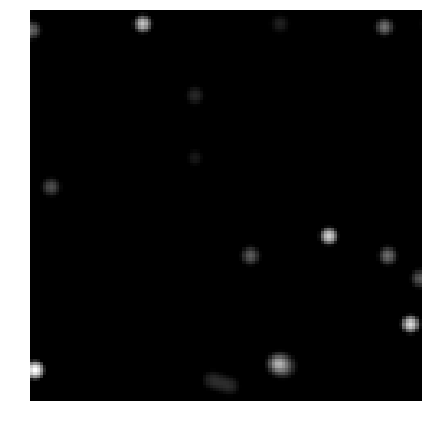

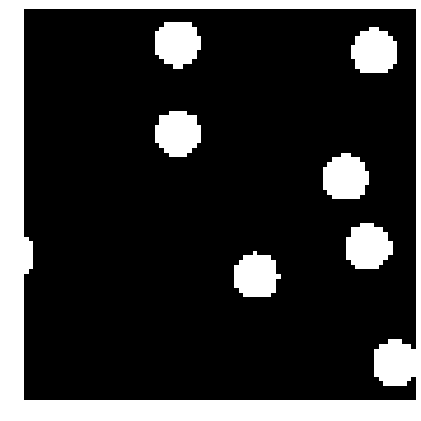

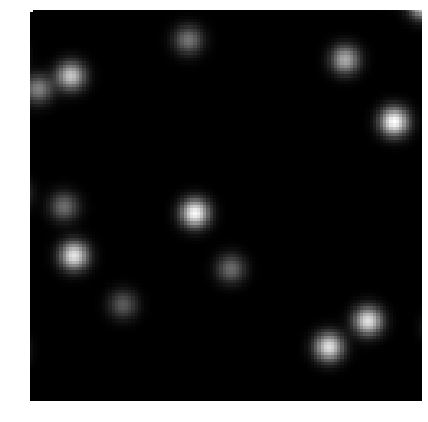

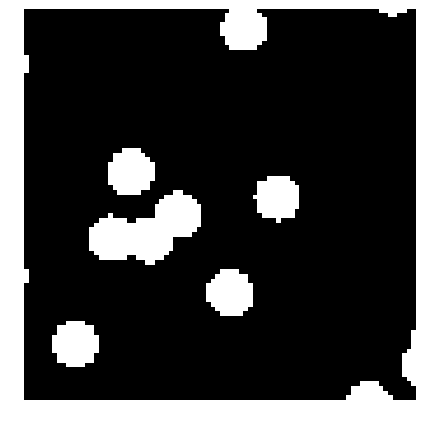

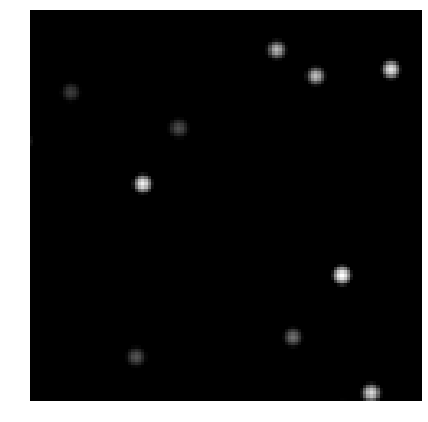

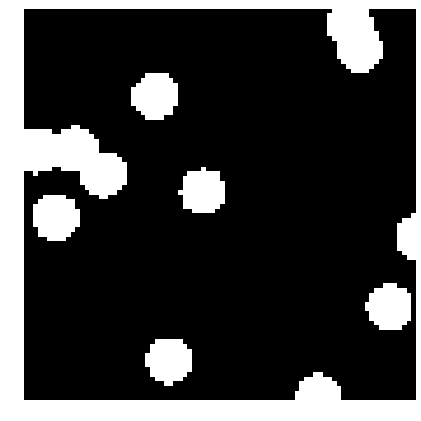

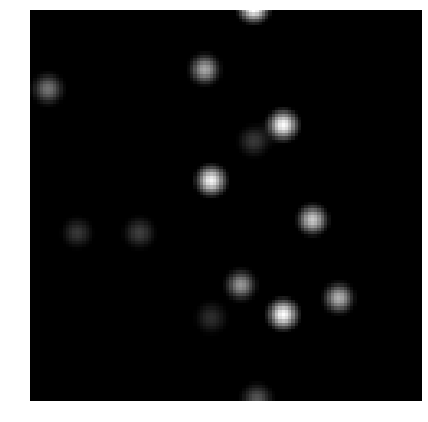

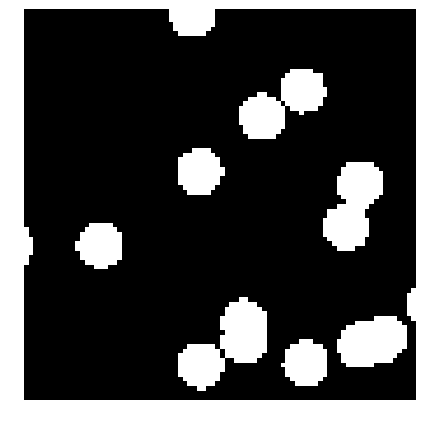

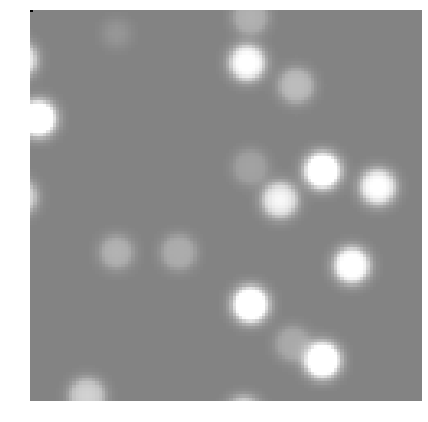

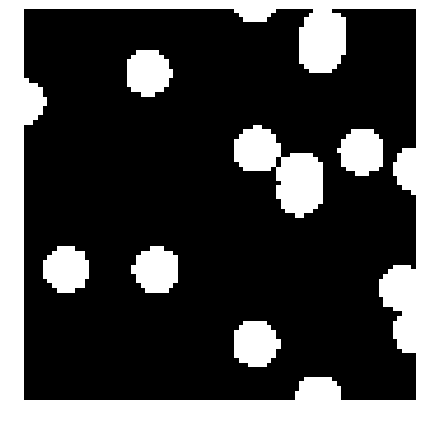

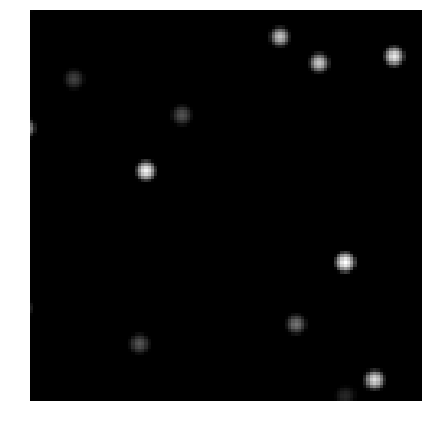

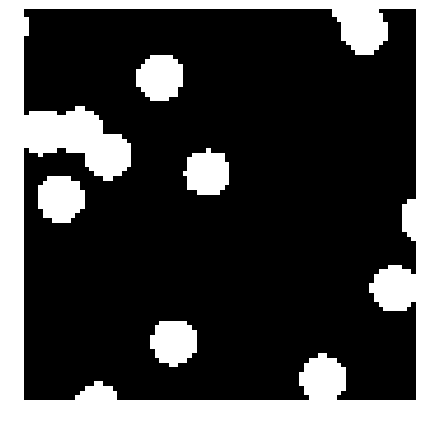

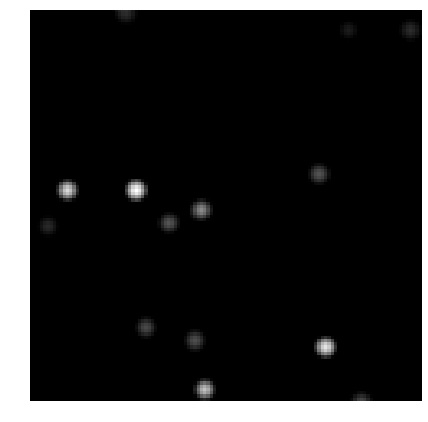

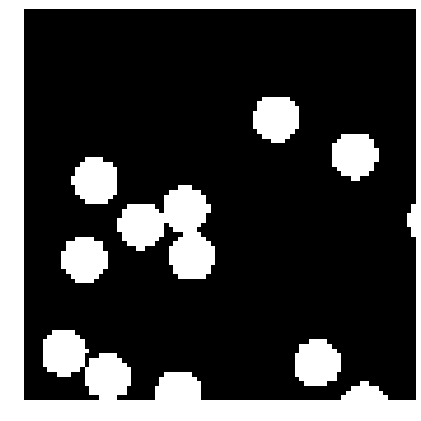

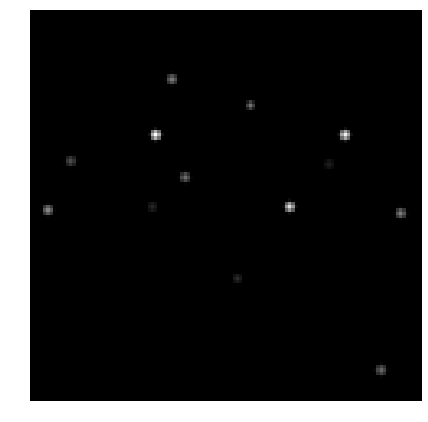

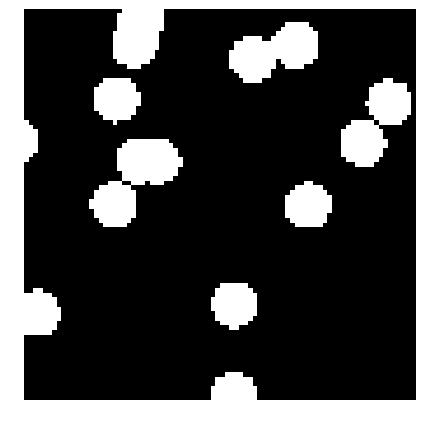

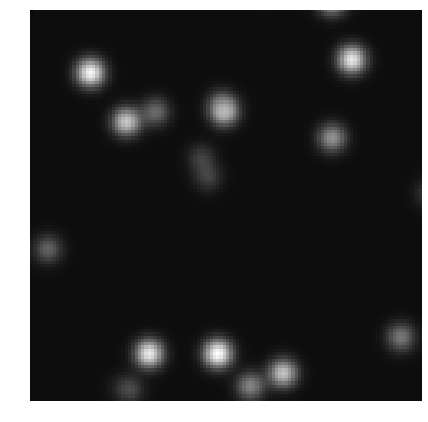

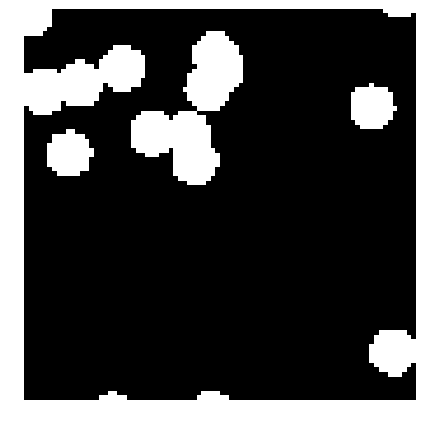

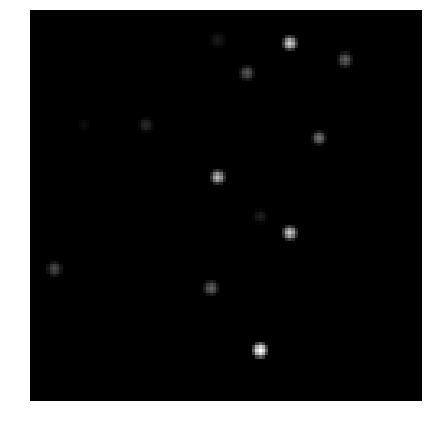

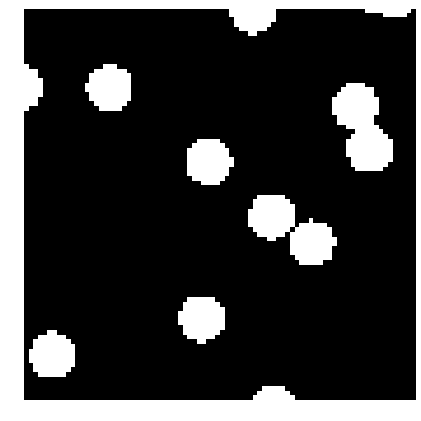

In [15]:
for i,pic in enumerate(batchData):
    image(np.mean(pic,axis=2))
    image(batchTruth[i,:,:,0])


## Training a toy network on toy data

In [16]:
import neurocatcher as nc
import fakearray as fa

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

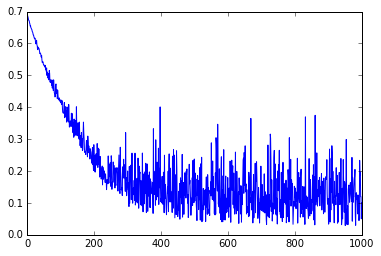

In [23]:
# generate some faux calcium imaging data
data, series, truth = fa.calcium_imaging(withparams=True)

# we will train a network that takes the mean image as input
data = [data.mean(axis=0)[..., np.newaxis]]
truth = [truth]

# each layer is defined by (filter footprint, 3 of features)
layers = [(3, 10), (3, 10)]

# the input will be a 15-by-15 patch with a single channel
inputShape = (15, 1)

# train network
acc, network = nc.network.trainConvNet(layers, inputShape, data, truth, batchSize=30, steps=1000)

# show how the loss changes during training
plt.plot(acc[:, 0])

1/1 [==============================] - 0s


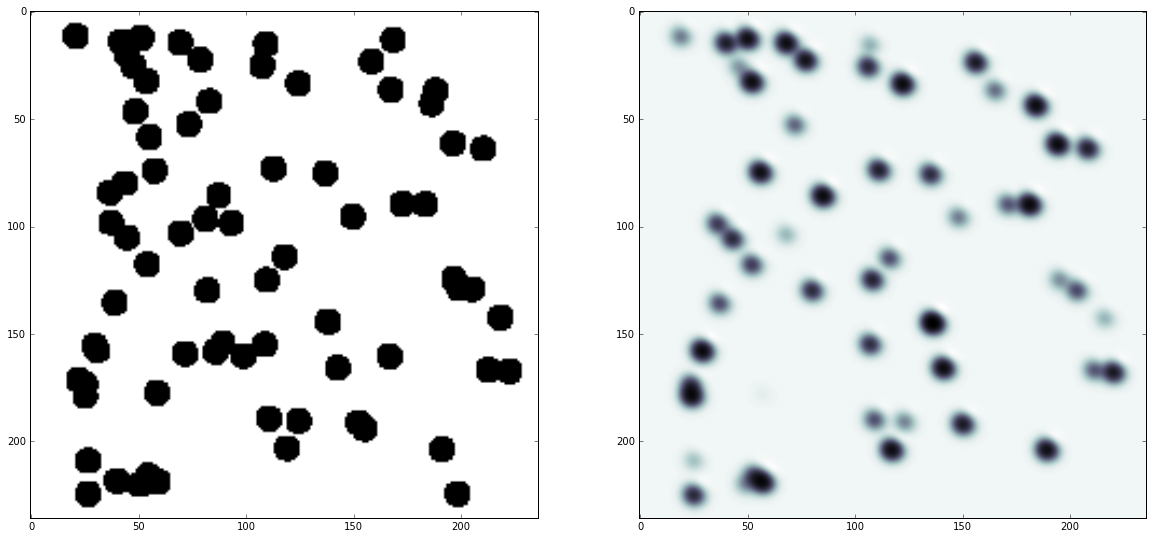

In [24]:
data,series,truth=calcium_imaging(shape=(240,240), n=75, t=10, noise=0.0, withparams=True)
data = [data.mean(axis=0)[..., np.newaxis]]
truth = [truth]

# get a prediction from the full data set
yhat, ytarget = nc.network.predictConvNet(network, data, truth)

# visualize the results
plt.figure(figsize=(20, 15))

plt.subplot(1, 2, 1)
plt.imshow(ytarget[0], cmap='bone')

plt.subplot(1, 2, 2)
plt.imshow(yhat[0], cmap='bone')